# K-Nearest Neighbours

### Task 1
Draw a graph that shows the distribution of the various labels across the entire dataset.

In [71]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [74]:
# loading dataset and extracting features

dataset=np.load('data.npy', allow_pickle=True)
# print(dataset)

columns=['Game ID', 'ResNet', 'VIT', 'Label', 'Guess Time']
df=pd.DataFrame(dataset, columns=columns)
df

# Extracting columns
resnet_values = df['ResNet']
vit_values = df['VIT']
labels = df['Label']

type(labels)

pandas.core.series.Series

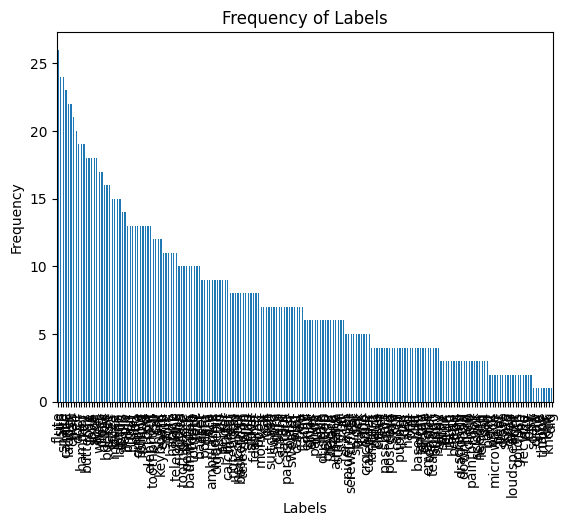

In [75]:
# trying to graphically represent the labels

label_counts=labels.value_counts()

# bar graph for frequency of labels
label_counts.plot(kind='bar')

plt.title('Frequency of Labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()